In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data set do PBF

In [3]:
#ds:
uri = 'datasetvis.csv'
ds = pd.read_csv(uri, encoding='latin-1')

#cópia de segurança
df = ds.copy()

#convertendo para formato correto de data
df['Referência'] = pd.to_datetime(df['Referência'], format='%m/%Y')

#mudando as colunas para tipo float:
df["Valor do Benefício médio (até Out/2021)"] = df["Valor do Benefício médio (até Out/2021)"].str.replace(',', '.')
df["Valor do Benefício médio (até Out/2021)"] = df["Valor do Benefício médio (até Out/2021)"].astype(float)

df["Valor repassado às famílias PBF (até Out/2021)"] = df["Valor repassado às famílias PBF (até Out/2021)"].str.replace(',', '.')
df["Valor repassado às famílias PBF (até Out/2021)"] = df["Valor repassado às famílias PBF (até Out/2021)"].astype(float)


In [4]:
df.head()

,Referência,Famílias PBF (até Out/2021),Famílias PBF (a partir de Mar/2023),Valor repassado às famílias PBF (até Out/2021),Valor repassado às famílias PBF (a partir de Mar/2023),Valor do Benefício médio (até Out/2021),Valor do Benefício médio (a partir de Mar/2023)
0,2004-01-01,3615861.0,NaN,263265315.0,NaN,72.81,NaN
1,2004-02-01,3615861.0,NaN,263258565.0,NaN,72.81,NaN
2,2004-03-01,3666020.0,NaN,265752730.0,NaN,72.49,NaN
3,2004-04-01,3766737.0,NaN,269441935.0,NaN,71.53,NaN
4,2004-05-01,3967829.0,NaN,280141245.0,NaN,70.60,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 7 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Referência                                              223 non-null    datetime64[ns]
 1   Famílias PBF (até Out/2021)                             214 non-null    float64       
 2   Famílias PBF (a partir de Mar/2023)                     9 non-null      float64       
 3   Valor repassado às famílias PBF (até Out/2021)          214 non-null    float64       
 4   Valor repassado às famílias PBF (a partir de Mar/2023)  9 non-null      object        
 5   Valor do Benefício médio (até Out/2021)                 214 non-null    float64       
 6   Valor do Benefício médio (a partir de Mar/2023)         9 non-null      object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 12.3+

In [6]:
df.describe()

,Famílias PBF (até Out/2021),Famílias PBF (a partir de Mar/2023),Valor repassado às famílias PBF (até Out/2021),Valor do Benefício médio (até Out/2021)
count,2.140000e+02,9.000000e+00,2.140000e+02,214.000000
mean,1.221130e+07,2.122424e+07,1.529845e+09,119.237336
std,2.628895e+06,1.716753e+05,8.221950e+08,51.133996
min,3.615861e+06,2.089921e+07,1.043448e+08,7.310000
25%,1.107799e+07,2.118632e+07,8.205227e+08,74.837500
50%,1.341250e+07,2.119418e+07,1.476909e+09,114.490000
75%,1.390431e+07,2.124902e+07,2.362522e+09,168.847500
max,1.469510e+07,2.147874e+07,2.712376e+09,191.860000


## Extraindo os dados

In [7]:
#média de jan/2005 até dez/2019
mask = (df['Referência'] >= '2004-01-01') & (df['Referência'] <= '2019-12-31')
filtered_df = df.loc[mask]

media = filtered_df['Valor do Benefício médio (até Out/2021)'].mean()

media = str(round(media,2)).replace('.',',')

print(f'A média da coluna "Valor do Benefício médio (até Out/2021)" de 01/2004 até 12/2019 é: R$ {media}.')

A média da coluna "Valor do Benefício médio (até Out/2021)" de 01/2004 até 12/2019 é: R$ 123,14.


# Data set do PIB

In [8]:
#ds:
uri = 'dsipea.csv'
ds2 = pd.read_csv(uri)

#cópia de segurança
df2 = ds2.copy()

#convertendo para formato correto de data
df2['Data'] = pd.to_datetime(df2['Data'].astype(str), format='%Y.%m')

#mudando o nome da coluna
df2 = df2.rename(columns = {"PIB - R$ - Banco Central do Brasil- Boletim- Seção Atividade Econômica (Bacen / Boletim / Ativ. Ec.) - BM12_PIB12": "PIB"})

In [9]:
df2.head()

,Data,PIB,Unnamed: 2
0,1990-01-01,0.2,NaN
1,1990-02-01,0.4,NaN
2,1990-03-01,0.8,NaN
3,1990-04-01,0.7,NaN
4,1990-05-01,0.8,NaN


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        406 non-null    datetime64[ns]
 1   PIB         406 non-null    float64       
 2   Unnamed: 2  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.6 KB


In [11]:
#média de jan/2005 até dez/2019
mask2 = (df2['Data'] >= '2004-01-01') & (df2['Data'] <= '2019-12-31')
filtered_df2 = df2.loc[mask2].reset_index(drop=True)

filtered_df2.head()

,Data,PIB,Unnamed: 2
0,2004-01-01,144558.6,NaN
1,2004-02-01,142861.3,NaN
2,2004-03-01,157363.5,NaN
3,2004-04-01,156953.9,NaN
4,2004-05-01,159498.9,NaN


# Comparando os valores

In [12]:
#soma do valor do benefício recebido pelas famílias para obter o total anual
df3 = df.groupby(df['Referência'].dt.year)['Valor repassado às famílias PBF (até Out/2021)'].sum().reset_index()

#renomeando
df3 = df3.rename(columns = {"Referência": "Ano", "Valor repassado às famílias PBF (até Out/2021)": "Valor repassado às famílias PBF"})

df3.head()

,Ano,Valor repassado às famílias PBF
0,2004,3.791785e+09
1,2005,5.691667e+09
2,2006,7.524661e+09
3,2007,8.965500e+09
4,2008,1.060650e+10


In [13]:
#soma mensal do pib por ano
df4 = filtered_df2.groupby(filtered_df2['Data'].dt.year)['PIB'].sum().reset_index()

#multiplicando por 10^6 para obter o valor em reais
df4['PIB'] = df4['PIB'] * 1e6

#renomeando
df4 = df4.rename(columns = {"Data": "Ano", "PIB": "PIB Anual"})

df4.head()

,Ano,PIB Anual
0,2004,1.957751e+12
1,2005,2.170585e+12
2,2006,2.409450e+12
3,2007,2.720263e+12
4,2008,3.109803e+12


In [14]:
df5 = pd.merge(df3, df4, on='Ano')

#relacionando os valores anuais do recebimento do PBF com a PIB anual criando um novo DF
df5['%PBF em relação ao PIB'] = (df3['Valor repassado às famílias PBF'] / df4['PIB Anual']) * 100

new_df = df5[['Ano', '%PBF em relação ao PIB']]

new_df.head()


,Ano,%PBF em relação ao PIB
0,2004,0.193681
1,2005,0.262218
2,2006,0.312298
3,2007,0.329582
4,2008,0.341067


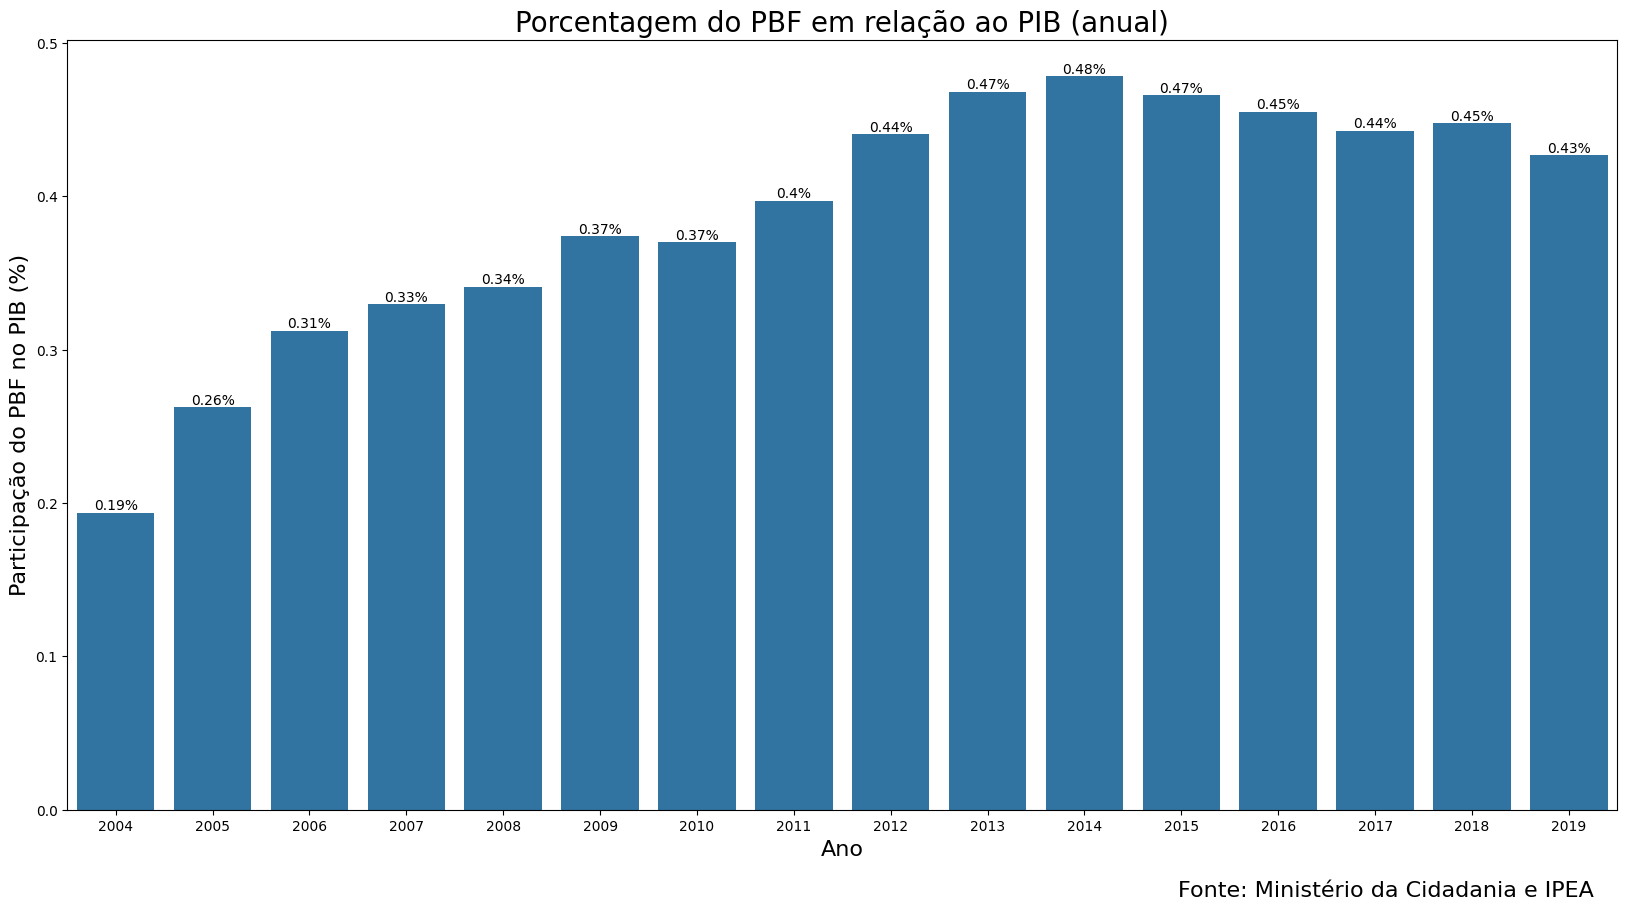

In [19]:
#barplot anual dos valores "Média Total (PBF)/PIB"
plt.figure(figsize=(20,10))
sns.barplot(x='Ano', y='%PBF em relação ao PIB', data=df5, color='#1f77b4')
plt.title('Porcentagem do PBF em relação ao PIB (anual)', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Participação do PBF no PIB (%)', fontsize=16)

#escrevendo os valores em cima das barras
for index, row in df5.iterrows():
    plt.annotate(f"{str(round(row['%PBF em relação ao PIB'],2))}%", (index, row['%PBF em relação ao PIB']), ha='center', va='bottom')

#escrevendo a fonte no rodapé
plt.annotate("Fonte: Ministério da Cidadania e IPEA", (0, 0), (800, -65), xycoords='axes fraction', textcoords='offset points', va='bottom', fontsize=16)

plt.show()